<a href="https://colab.research.google.com/github/TokaOssama/Volcanic-Eruption-Prediction/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import libraries
import numpy as np
import pandas as pd
import os
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from keras.layers import *
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import optimizers
from tensorflow.keras import initializers

In [10]:
from google.colab import drive
drive.mount('/content/drive')
Data =np.load('/content/drive/My Drive/Volcano Project/Saveddata.npy')
print(Data.shape)
Data=Data.reshape(Data.shape[0],Data.shape[3],Data.shape[1]*Data.shape[2])
print(Data.shape)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(4431, 10, 25, 202)
(4431, 202, 250)


In [12]:
target_file = pd.read_csv ('./drive/My Drive/VolcanicData/train.csv')
target_file.head()


,segment_id,time_to_eruption
0,1136037770,12262005
1,1969647810,32739612
2,1895879680,14965999
3,2068207140,26469720
4,192955606,31072429


In [13]:
filename = []
for file in target_file['segment_id']:
    filename.append('./drive/My Drive/VolcanicData/train/'+str(file)+'.csv')
target_file['filename'] = filename
target_file= target_file.drop('segment_id',axis = 1)
target_file.head()

,time_to_eruption,filename
0,12262005,./drive/My Drive/VolcanicData/train/1136037770...
1,32739612,./drive/My Drive/VolcanicData/train/1969647810...
2,14965999,./drive/My Drive/VolcanicData/train/1895879680...
3,26469720,./drive/My Drive/VolcanicData/train/2068207140...
4,31072429,./drive/My Drive/VolcanicData/train/192955606.csv


In [14]:
tags = np.array(target_file["time_to_eruption"])
Tags=np.array(tags)
print(Tags)

[12262005 32739612 14965999 ... 31206935  9598270 20128938]


In [15]:
#splitting into train and test sets
x_train, x_test, y_train, y_test = train_test_split(Data, tags, test_size=0.25)
x_valid,x_testing,y_valid,y_testing= train_test_split(x_test, y_test, test_size=0.25)
x_train= x_train.astype('float32')
y_train=y_train.astype('float32')
x_test= x_test.astype('float32')
y_test=y_test.astype('float32')
#x_train=np.dstack(x_train).T
#x_test=np.dstack(x_test).T
print(x_train.shape)
print(y_train.shape)
print(x_train)
print(x_valid.shape)
print(x_testing.shape)

(3323, 202, 250)
(3323,)
[[[2.23360252e+01 2.84884186e+01 4.96317940e+01 ... 6.01128769e+01
   5.02684021e+01 5.02474098e+01]
  [2.47283878e+01 5.99595833e+01 7.85686722e+01 ... 3.57198219e+01
   1.88335571e+01 3.64148140e+01]
  [4.96520882e+01 3.70996742e+01 3.72151375e+01 ... 6.82942657e+01
   6.98340302e+01 4.43078957e+01]
  ...
  [2.99242169e-01 5.46417952e-01 9.15067494e-01 ... 2.49034852e-01
   3.18627000e-01 3.94272923e-01]
  [2.77121931e-01 4.01618928e-01 3.08328807e-01 ... 5.80540121e-01
   1.03397620e+00 8.81325424e-01]
  [1.56838131e+00 2.47178149e+00 4.48122263e+00 ... 5.35732269e-01
   1.85612166e+00 0.00000000e+00]]

 [[1.14611979e+01 1.01146385e+02 6.04217606e+01 ... 1.03421059e+02
   5.28269539e+01 3.44149208e+01]
  [6.77534943e+01 6.58225784e+01 4.84739304e+01 ... 5.93409233e+01
   5.73398170e+01 8.04691772e+01]
  [5.10674973e+01 1.23668995e+01 4.38875160e+01 ... 3.31839981e+01
   3.62060890e+01 3.48592415e+01]
  ...
  [1.41668618e+00 2.16571879e+00 6.25587177e+00 ... 

In [17]:
%cd '/content/gdrive/My\ Drive/'
model = Sequential()
#model.add(tf.keras.layers.MaxPool1D(pool_size=1000,strides=1000))
model.add(BatchNormalization())
model.add(Bidirectional(LSTM(64,dropout=0.2,return_sequences=True,input_shape=(x_train.shape[1],x_train.shape[2]))))
model.add(BatchNormalization())
model.add(Bidirectional(LSTM(64,dropout=0.2,return_sequences=True,input_shape=(x_train.shape[1],x_train.shape[2]))))
model.add(BatchNormalization())
#callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
#model.add(Bidirectional(LSTM(64,dropout=0.5,return_sequences=True,input_shape=(x_train.shape[1],x_train.shape[2]))))
#model.add(BatchNormalization())
#model.add(Conv1D(filters=128,strides=2, kernel_size=2, padding='same', activation='relu',kernel_initializer="glorot_uniform"))
#model.add(Conv1D(filters=84,strides=2, kernel_size=2, padding='same', activation='relu',kernel_initializer="glorot_uniform"))
#model.add(Conv1D(filters=64,strides=2, kernel_size=2, padding='same', activation='relu',kernel_initializer="glorot_uniform"))
model.add(Flatten())
model.add(Dense(64,activation='relu',kernel_initializer='normal'))
model.add(Dense(32,activation='relu',kernel_initializer='normal'))
model.add(Dense(1,activation='relu',kernel_initializer='normal'))
adam = optimizers.Adam(lr=0.0005, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='mae', optimizer=adam)
# fit network
history = model.fit(x_train, y_train, epochs=1000, batch_size=128, validation_data=(x_valid, y_valid), verbose=1, shuffle=False)

[Errno 2] No such file or directory: '/content/gdrive/My\\ Drive/'
/content
Epoch 1/1000
26/26 [==============================] - 16s 133ms/step - loss: 23292851.5556 - val_loss: 22442378.0000
Epoch 2/1000
26/26 [==============================] - 2s 78ms/step - loss: 23292560.0000 - val_loss: 22442018.0000
Epoch 3/1000
26/26 [==============================] - 2s 78ms/step - loss: 23291212.2222 - val_loss: 22440128.0000
Epoch 4/1000
26/26 [==============================] - 2s 77ms/step - loss: 23287324.2963 - val_loss: 22434730.0000
Epoch 5/1000
26/26 [==============================] - 2s 78ms/step - loss: 23278792.5926 - val_loss: 22423156.0000
Epoch 6/1000
26/26 [==============================] - 2s 78ms/step - loss: 23262933.0370 - val_loss: 22402238.0000
Epoch 7/1000
26/26 [==============================] - 2s 77ms/step - loss: 23236719.4815 - val_loss: 22368680.0000
Epoch 8/1000
26/26 [==============================] - 2s 78ms/step - loss: 23196694.6667 - val_loss: 22318036.0000
Ep

In [18]:
test =np.load('/content/drive/My Drive/Volcano Project/working.npy')
print(test.shape)
test=test.reshape(test.shape[0],test.shape[3],test.shape[1]*test.shape[2])
print(test.shape)
print(test)

(4520, 10, 25, 202)
(4520, 202, 250)
[[[ 22.84468339  66.23457889  69.8347958  ...  55.70294558  72.15303913
    52.39225631]
  [ 54.12227343  92.97968523  59.95052093 ...  40.02510747  33.38346321
    37.69379337]
  [ 42.46846498  40.52926693  51.03609899 ...  40.66036371  31.27244264
    15.54386169]
  ...
  [  0.           0.           0.         ...   0.           0.
     0.        ]
  [  0.           0.           0.         ...   0.           0.
     0.        ]
  [  0.           0.           0.         ...   0.           0.
     0.        ]]

 [[ 62.19222962 122.95348943  82.28835119 ...  21.84148968  37.6002998
    26.68722232]
  [ 73.17447546 110.80438539  90.15961961 ...  26.15725841  50.19376827
    32.80989569]
  [ 53.75204886  64.29904569  24.91471336 ...  18.52290176  23.11697626
    17.92297968]
  ...
  [  0.48303298   0.48481326   0.58395481 ...   0.73302708   0.50117869
     0.40340273]
  [  0.62246037   0.38502043   0.3334024  ...   0.78565433   0.80754314
     1.16447

In [19]:
submission= pd.read_csv ('/content/drive/My Drive/Volcano/sample_submission.csv')
print(submission)

      segment_id  time_to_eruption
0     1000213997                 0
1      100023368                 0
2     1000488999                 0
3     1001028887                 0
4     1001857862                 0
...          ...               ...
4515   996704281                 0
4516   997630809                 0
4517   998072137                 0
4518   998136924                 0
4519    99975682                 0

[4520 rows x 2 columns]


In [21]:
prediction = model.predict(test)
print(prediction)
submission['time_to_eruption']=prediction
submission.head()
compression_opts = dict(method='zip',archive_name='out.csv')  
submission.to_csv('out2.zip', index=False, compression=compression_opts) 

[[31942800.]
 [36936980.]
 [13787297.]
 ...
 [ 9314905.]
 [42519024.]
 [35268856.]]


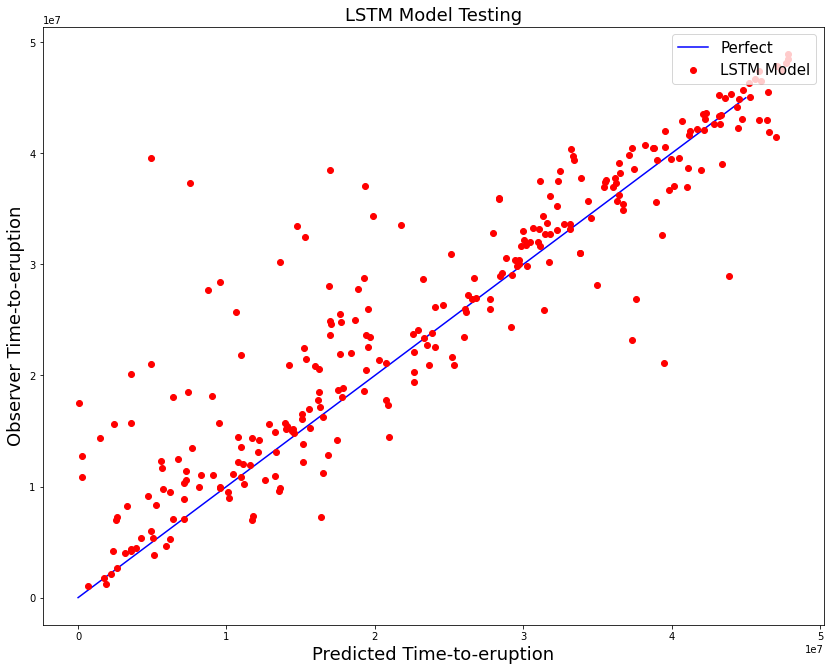

In [32]:
predicted=model.predict(x_testing)
plt.figure(figsize=(14,11))
x = np.linspace(0,45*10**6)
plt.plot(x,x,'b',linestyle='-',label='Perfect')
plt.plot(y_testing,predicted,'r',linestyle='',marker='o',label='LSTM Model')
plt.ylabel('Observer Time-to-eruption',fontsize=18)
plt.xlabel('Predicted Time-to-eruption',fontsize=18)
plt.title('LSTM Model Testing',fontsize=18)
plt.legend(fontsize=15,loc='upper right')
plt.show()

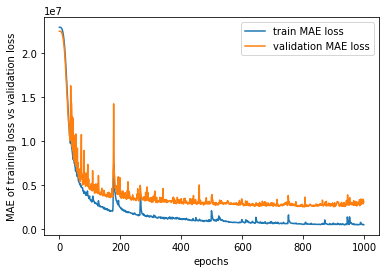

In [22]:
plt.plot(history.history['loss'], label='train MAE loss')
plt.plot(history.history['val_loss'], label='validation MAE loss')
plt.ylabel('MAE of training loss vs validation loss')
plt.xlabel('epochs')
plt.legend()
plt.show()

In [31]:
score = model.evaluate(x_testing, y_testing,verbose=0)
print(score)

3805102.5
